In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Task1

In [40]:
# Load the data
data = np.loadtxt("data_ozone_merged.csv", delimiter=",")

In [41]:
# Check shape
print("Data shape:", data.shape)

Data shape: (810, 336)


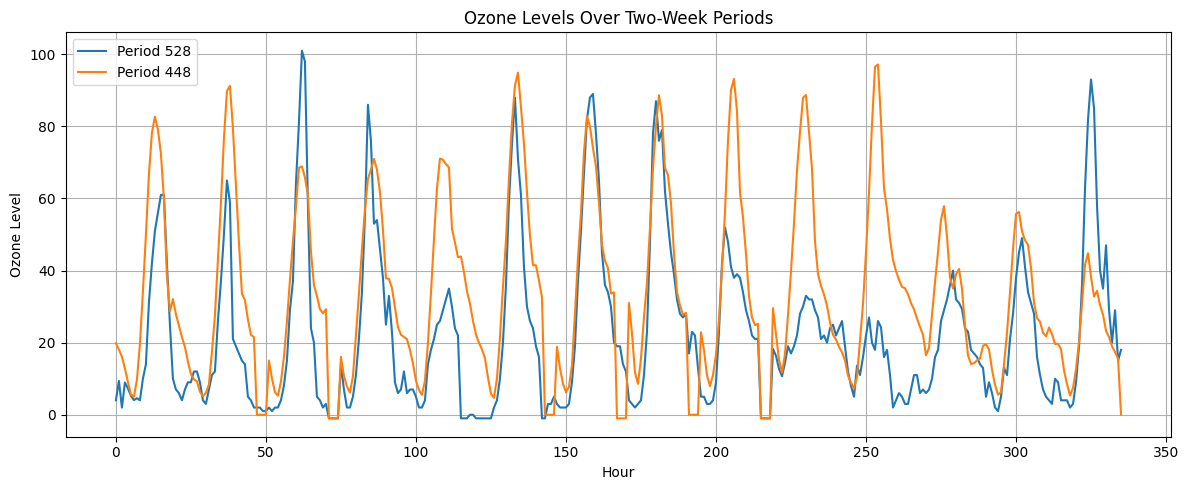

In [42]:
# Randomly select two rows
random_indices = np.random.choice(data.shape[0], size=2, replace=False)
selected_data = data[random_indices]

# Plot the selected rows
plt.figure(figsize=(12, 5))
for i, idx in enumerate(random_indices):
    plt.plot(selected_data[i], label=f'Period {idx}')
plt.xlabel("Hour")
plt.ylabel("Ozone Level")
plt.title("Ozone Levels Over Two-Week Periods")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Q4_task1.png")
plt.show()

In [43]:
# Print selected indices for reference
print("Selected row indices:", random_indices.tolist())

Selected row indices: [528, 448]


### Task2

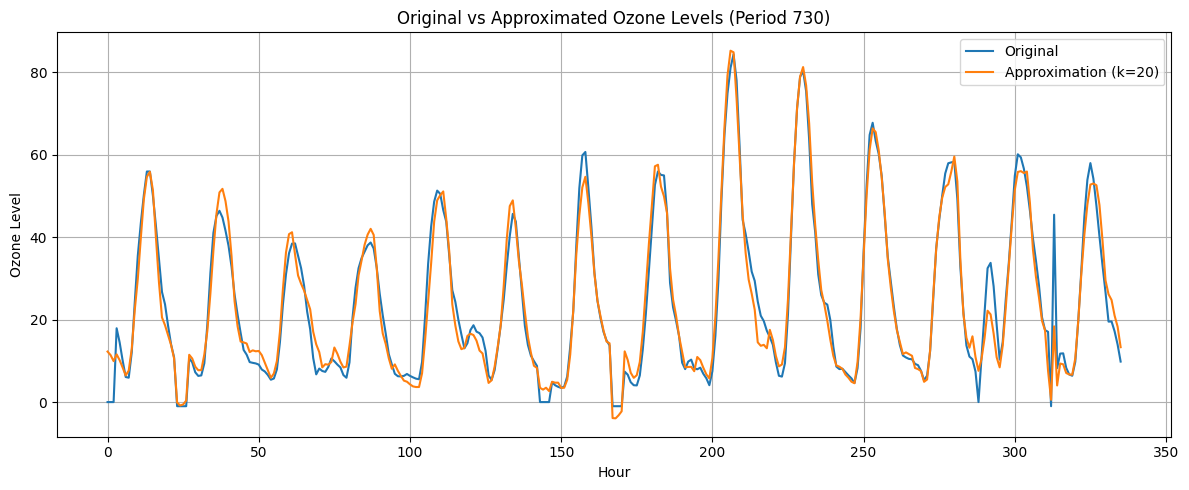

In [44]:
# Perform SVD
U, s, Vt = np.linalg.svd(data, full_matrices=False)

# Reduce to 20 components
k = 20
U_k = U[:, :k]
s_k = s[:k]
Vt_k = Vt[:k, :]

# Reconstruct approximation
data_approx = U_k @ np.diag(s_k) @ Vt_k

# Plot original vs approximated for random sample
random_idx = np.random.randint(data.shape[0])
plt.figure(figsize=(12, 5))
plt.plot(data[random_idx], label='Original')
plt.plot(data_approx[random_idx], label=f'Approximation (k={k})')
plt.xlabel("Hour")
plt.ylabel("Ozone Level")
plt.title(f"Original vs Approximated Ozone Levels (Period {random_idx})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Print reconstruction error
original = data[random_idx]
reconstructed = data_approx[random_idx]
error = np.linalg.norm(original - reconstructed) / np.linalg.norm(original)
print(f"Relative reconstruction error (row {random_idx}): {error:.4f}")

Relative reconstruction error (row 730): 0.1249


### Task3

In [33]:
# Calculate cumulative explained variance
total_variance = np.sum(s**2)
explained_variance = (s**2) / total_variance
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 95% variance
k_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Components needed for 95% variance: {k_95}")

Components needed for 95% variance: 7


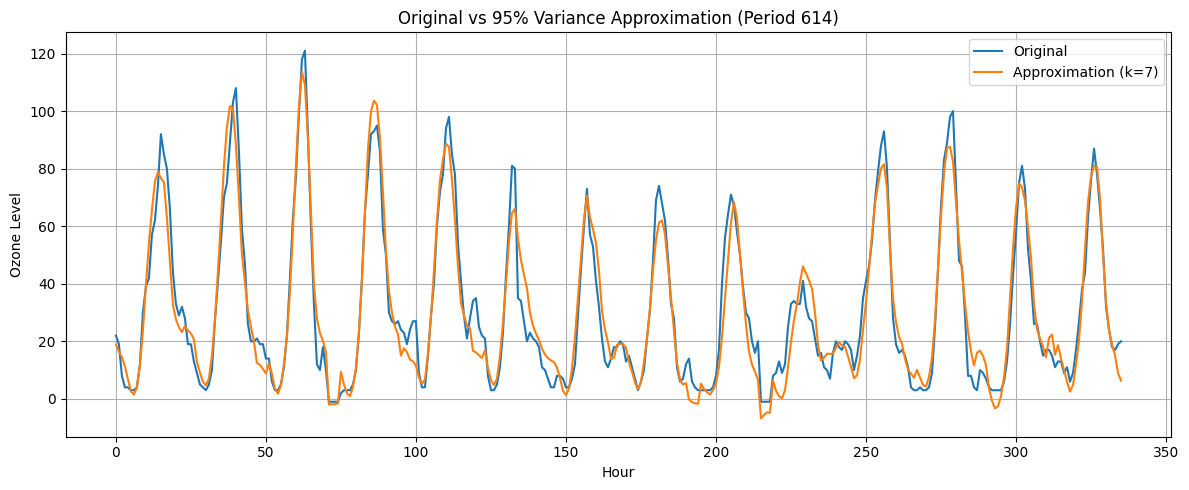

In [29]:
# Reconstruct with k_95 components
U_k95 = U[:, :k_95]
s_k95 = s[:k_95]
Vt_k95 = Vt[:k_95, :]
data_approx_95 = U_k95 @ np.diag(s_k95) @ Vt_k95

# Plot
random_idx = np.random.randint(data.shape[0])
plt.figure(figsize=(12, 5))
plt.plot(data[random_idx], label='Original')
plt.plot(data_approx_95[random_idx], label=f'Approximation (k={k_95})')
plt.xlabel("Hour")
plt.ylabel("Ozone Level")
plt.title(f"Original vs 95% Variance Approximation (Period {random_idx})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Variance explained by first two components
print(f"Variance explained by first 2 singular values: {cumulative_variance[1]*100:.2f}%")

Variance explained by first 2 singular values: 91.40%
